In [1]:
import numpy as np
import matplotlib.pyplot as plt

from absent_minded_driver import Absent_Minded_Driver
from evidential_blackmail import Evidential_Blackmail
from general2by2game import General2by2
from death_in_damascus import Death_In_Damascus
from prisoners_dilemma_against_copy import Prisoners_Dilemma_against_copy
from agents import *


In [2]:
exploration_scheme = More_Advanced_Softmax(exponential_cooling)
learning_scheme = Identity_Function()
decision_problem = Prisoners_Dilemma_against_copy()

agent = More_Advanced_Agent(exploration_scheme, learning_scheme, decision_problem)

Softmax with exponential cooling playing PD against coppy
Expected utilities


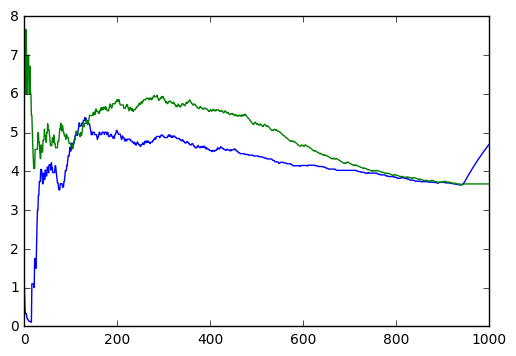

Action probabilities


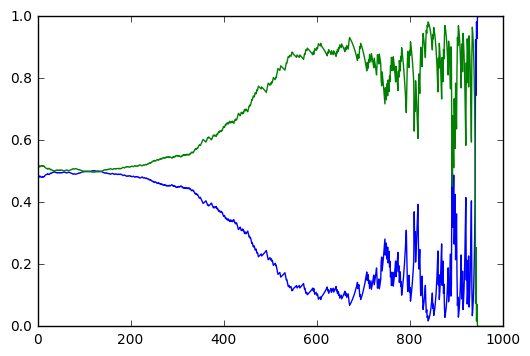

In [3]:
iterations = 1
epochs = 1000
batch_size = 1

for i in range(iterations):

    agent = More_Advanced_Agent(exploration_scheme, learning_scheme, decision_problem)
    expected_utilities = []
    action_probabilities = []

    for j in range(epochs):
        history = decision_problem.run(agent, batch_size)
        agent.learn_from(history)

        expected_utilities.append(np.array([agent.expected_utility['START']['Cooperate'],
                                            agent.expected_utility['START']['Defect'],
                                           ]))
        action_probabilities.append(agent.get_action_distribution('START'))

expected_utilities = np.vstack(expected_utilities)
action_probabilities = np.vstack(action_probabilities)

print("Softmax with exponential cooling playing PD against coppy")
print("Expected utilities")
plt.plot(range(epochs),expected_utilities[:,0],range(epochs),expected_utilities[:,1])
plt.show()
print("Action probabilities")
plt.plot(range(epochs),action_probabilities[:,0],range(epochs),action_probabilities[:,1])
plt.show()